In [23]:
# Apply XGBoost regression algorithm on the
# Boston housing data set and compare its
# performance against Linear regression.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [25]:
dataset = pd.read_excel('boston housing.xls')
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [26]:
# dataset summary
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [27]:
# finding out null data => missing data
dataset.isnull().sum()

# inference => no missing data

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
PT       0
B        0
LSTAT    0
MV       0
dtype: int64

In [28]:
dataset.shape

(506, 14)

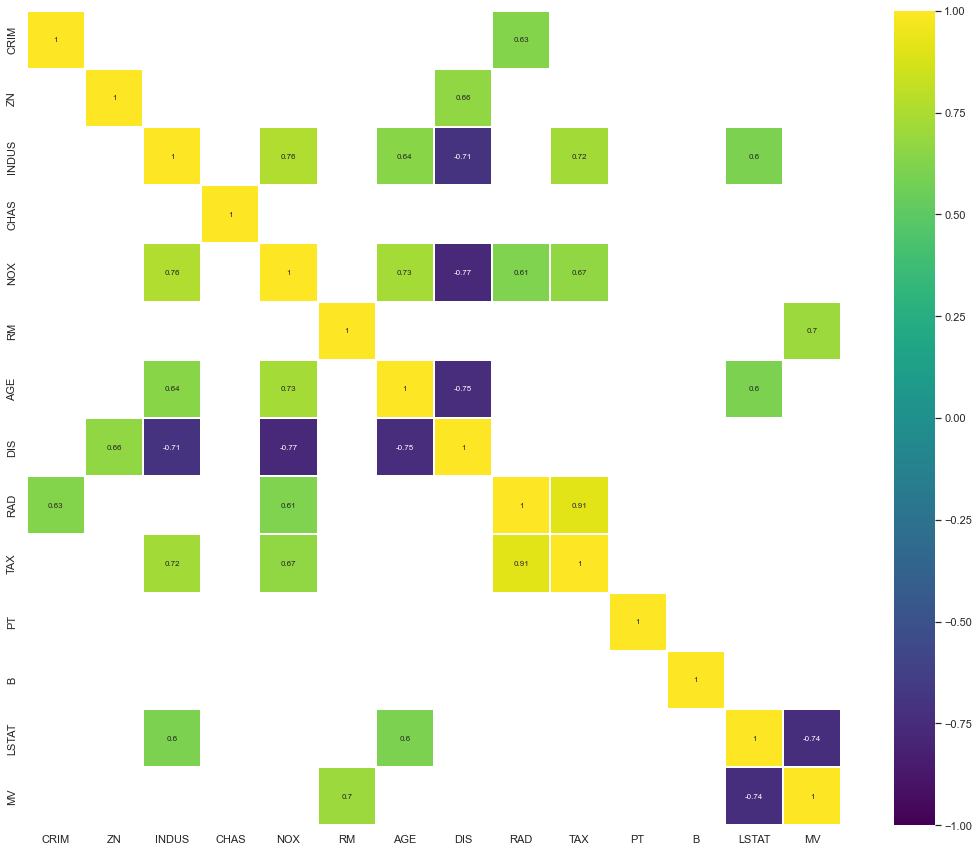

In [29]:
#create a correlation matrix
corr = dataset.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr[(corr >= 0.6) | (corr <= -0.7)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.tight_layout()
plt.show()

In [30]:
# correlation matrix
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [31]:
# dropping features that are highly correlated
# to minimize multicollinearity

dataset_updated = dataset.drop(['NOX','DIS', 'TAX',],axis = 1)

# correlation threshold >= 0.7 and  <= -0.7

In [32]:
dataset_updated.shape

(506, 11)

In [33]:
# column names
for column in dataset_updated.columns: print(column)

CRIM
ZN
INDUS
CHAS
RM
AGE
RAD
PT
B
LSTAT
MV


In [34]:
# checking for bias and variance before we normalize the data for every column

Column:  CRIM


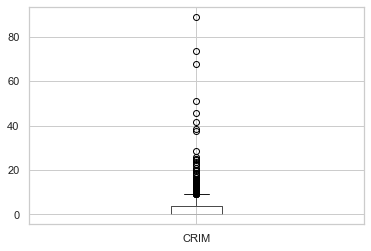

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976196
Name: CRIM, dtype: float64
Skewness:  5.223148719551591


Column:  ZN


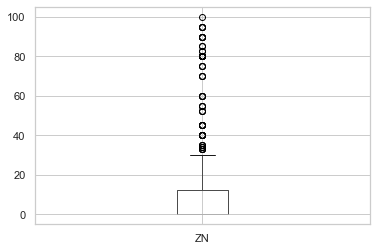

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64
Skewness:  2.2256663227354307


Column:  INDUS


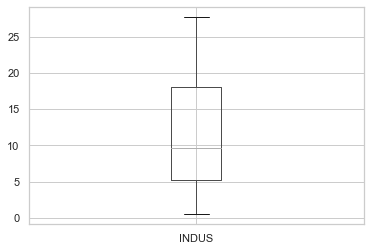

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64
Skewness:  0.2950215320650256


Column:  CHAS


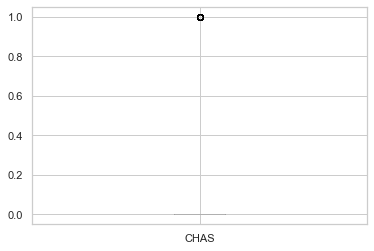

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64
Skewness:  3.405904172058746


Column:  RM


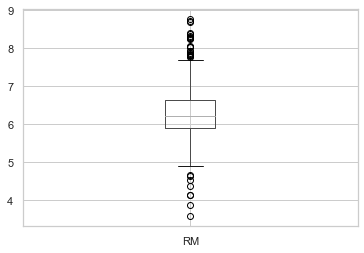

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64
Skewness:  0.4036121186374177


Column:  AGE


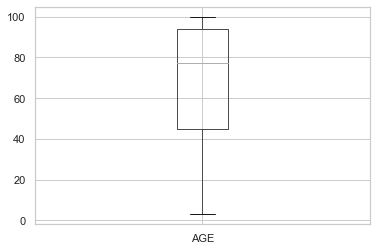

count    506.000000
mean      68.574901
std       28.148862
min        2.900000
25%       45.025000
50%       77.500000
75%       94.074999
max      100.000000
Name: AGE, dtype: float64
Skewness:  -0.5989626330251514


Column:  RAD


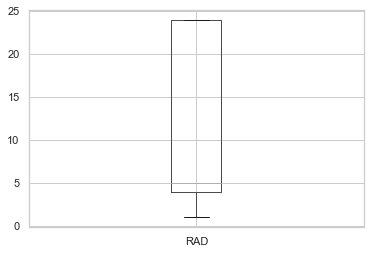

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64
Skewness:  1.0048146482182057


Column:  PT


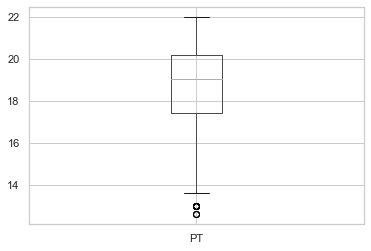

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200001
max       22.000000
Name: PT, dtype: float64
Skewness:  -0.80232476663849


Column:  B


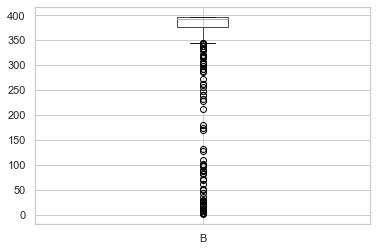

count    506.000000
mean     356.674030
std       91.294863
min        0.320000
25%      375.377487
50%      391.440002
75%      396.225006
max      396.899994
Name: B, dtype: float64
Skewness:  -2.8903737518164783


Column:  LSTAT


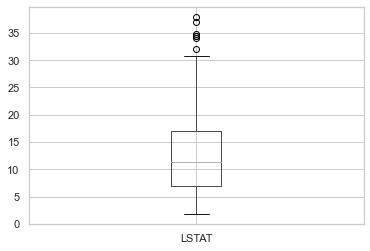

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.954999
max       37.970001
Name: LSTAT, dtype: float64
Skewness:  0.9064600940230932


Column:  MV


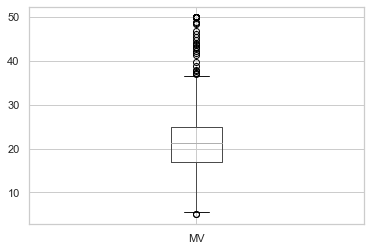

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200001
75%       25.000000
max       50.000000
Name: MV, dtype: float64
Skewness:  1.1080983902074517




In [35]:
for column in dataset_updated.columns:
    dataset_updated.boxplot(column=column)
    print('Column: ', column)
    plt.show()
    print(dataset_updated[column].describe())
    print('Skewness: ', dataset_updated[column].skew())
    print('\n')

Column:  CRIM


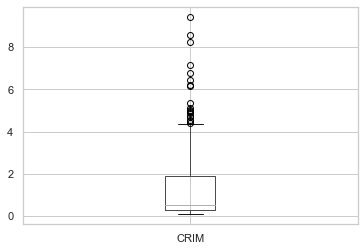

count    506.000000
mean       1.229439
std        1.451263
min        0.079498
25%        0.286435
50%        0.506461
75%        1.917572
max        9.432719
Name: CRIM, dtype: float64
Skewness:  2.0243820957055503


Column:  ZN


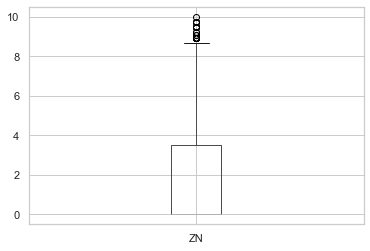

count    506.000000
mean       1.655434
std        2.939430
min        0.000000
25%        0.000000
50%        0.000000
75%        3.535534
max       10.000000
Name: ZN, dtype: float64
Skewness:  1.4762928299237978


Column:  INDUS


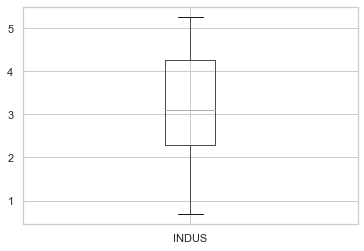

count    506.000000
mean       3.155005
std        1.088606
min        0.678233
25%        2.278157
50%        3.112876
75%        4.254410
max        5.266878
Name: INDUS, dtype: float64
Skewness:  -0.07260939860118307


Column:  CHAS


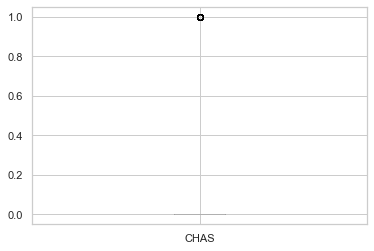

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64
Skewness:  3.405904172058746


Column:  RM


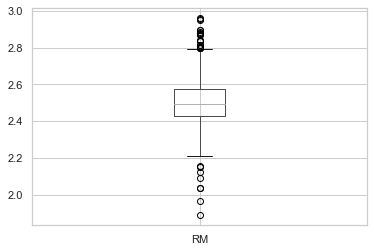

count    506.000000
mean       2.503021
std        0.139851
min        1.887061
25%        2.426005
50%        2.491686
75%        2.573616
max        2.963106
Name: RM, dtype: float64
Skewness:  0.07271434788796793


Column:  AGE


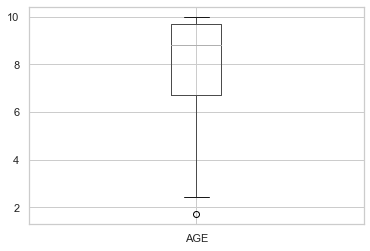

count    506.000000
mean       8.044595
std        1.966478
min        1.702939
25%        6.710066
50%        8.803401
75%        9.699226
max       10.000000
Name: AGE, dtype: float64
Skewness:  -0.9774659216143072


Column:  RAD


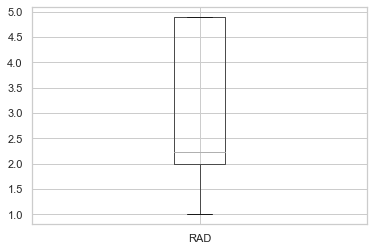

count    506.000000
mean       2.806559
std        1.294583
min        1.000000
25%        2.000000
50%        2.236068
75%        4.898979
max        4.898979
Name: RAD, dtype: float64
Skewness:  0.8238438790801812


Column:  PT


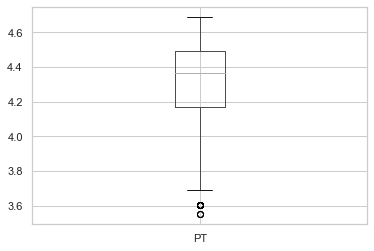

count    506.000000
mean       4.288169
std        0.259375
min        3.549648
25%        4.171331
50%        4.364627
75%        4.494441
max        4.690416
Name: PT, dtype: float64
Skewness:  -0.9060759790222385


Column:  B


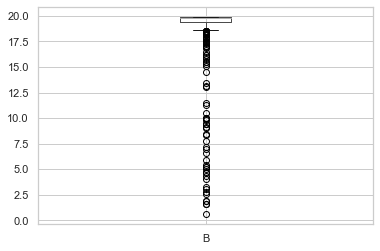

count    506.000000
mean      18.540526
std        3.598405
min        0.565685
25%       19.374661
50%       19.784843
75%       19.905401
max       19.922349
Name: B, dtype: float64
Skewness:  -3.356218780783126


Column:  LSTAT


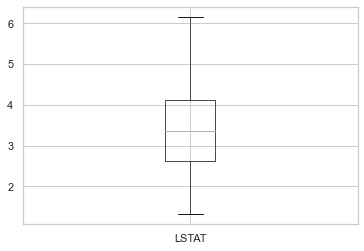

count    506.000000
mean       3.417673
std        0.987167
min        1.315295
25%        2.636277
50%        3.370459
75%        4.117645
max        6.161980
Name: LSTAT, dtype: float64
Skewness:  0.3073905050553206


Column:  MV


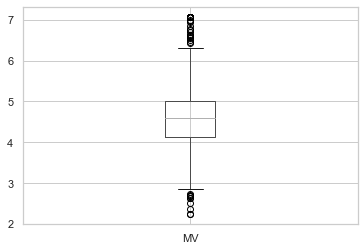

count    506.000000
mean       4.653817
std        0.936229
min        2.236068
25%        4.126133
50%        4.604346
75%        5.000000
max        7.071068
Name: MV, dtype: float64
Skewness:  0.43893530771312605




In [36]:
# applying sqrt operation on each column
# note : we cannot use sqrt operation of negative data for obvious reasons

# other techniques to normalize data:
# log transform, Z score, Min-Max

for column in dataset_updated.columns:
    dataset_updated[column] = np.sqrt(dataset_updated[column])
    dataset_updated.boxplot(column=column)
    print('Column: ', column)
    plt.show()
    print(dataset_updated[column].describe())
    print('Skewness: ', dataset_updated[column].skew())
    print('\n')

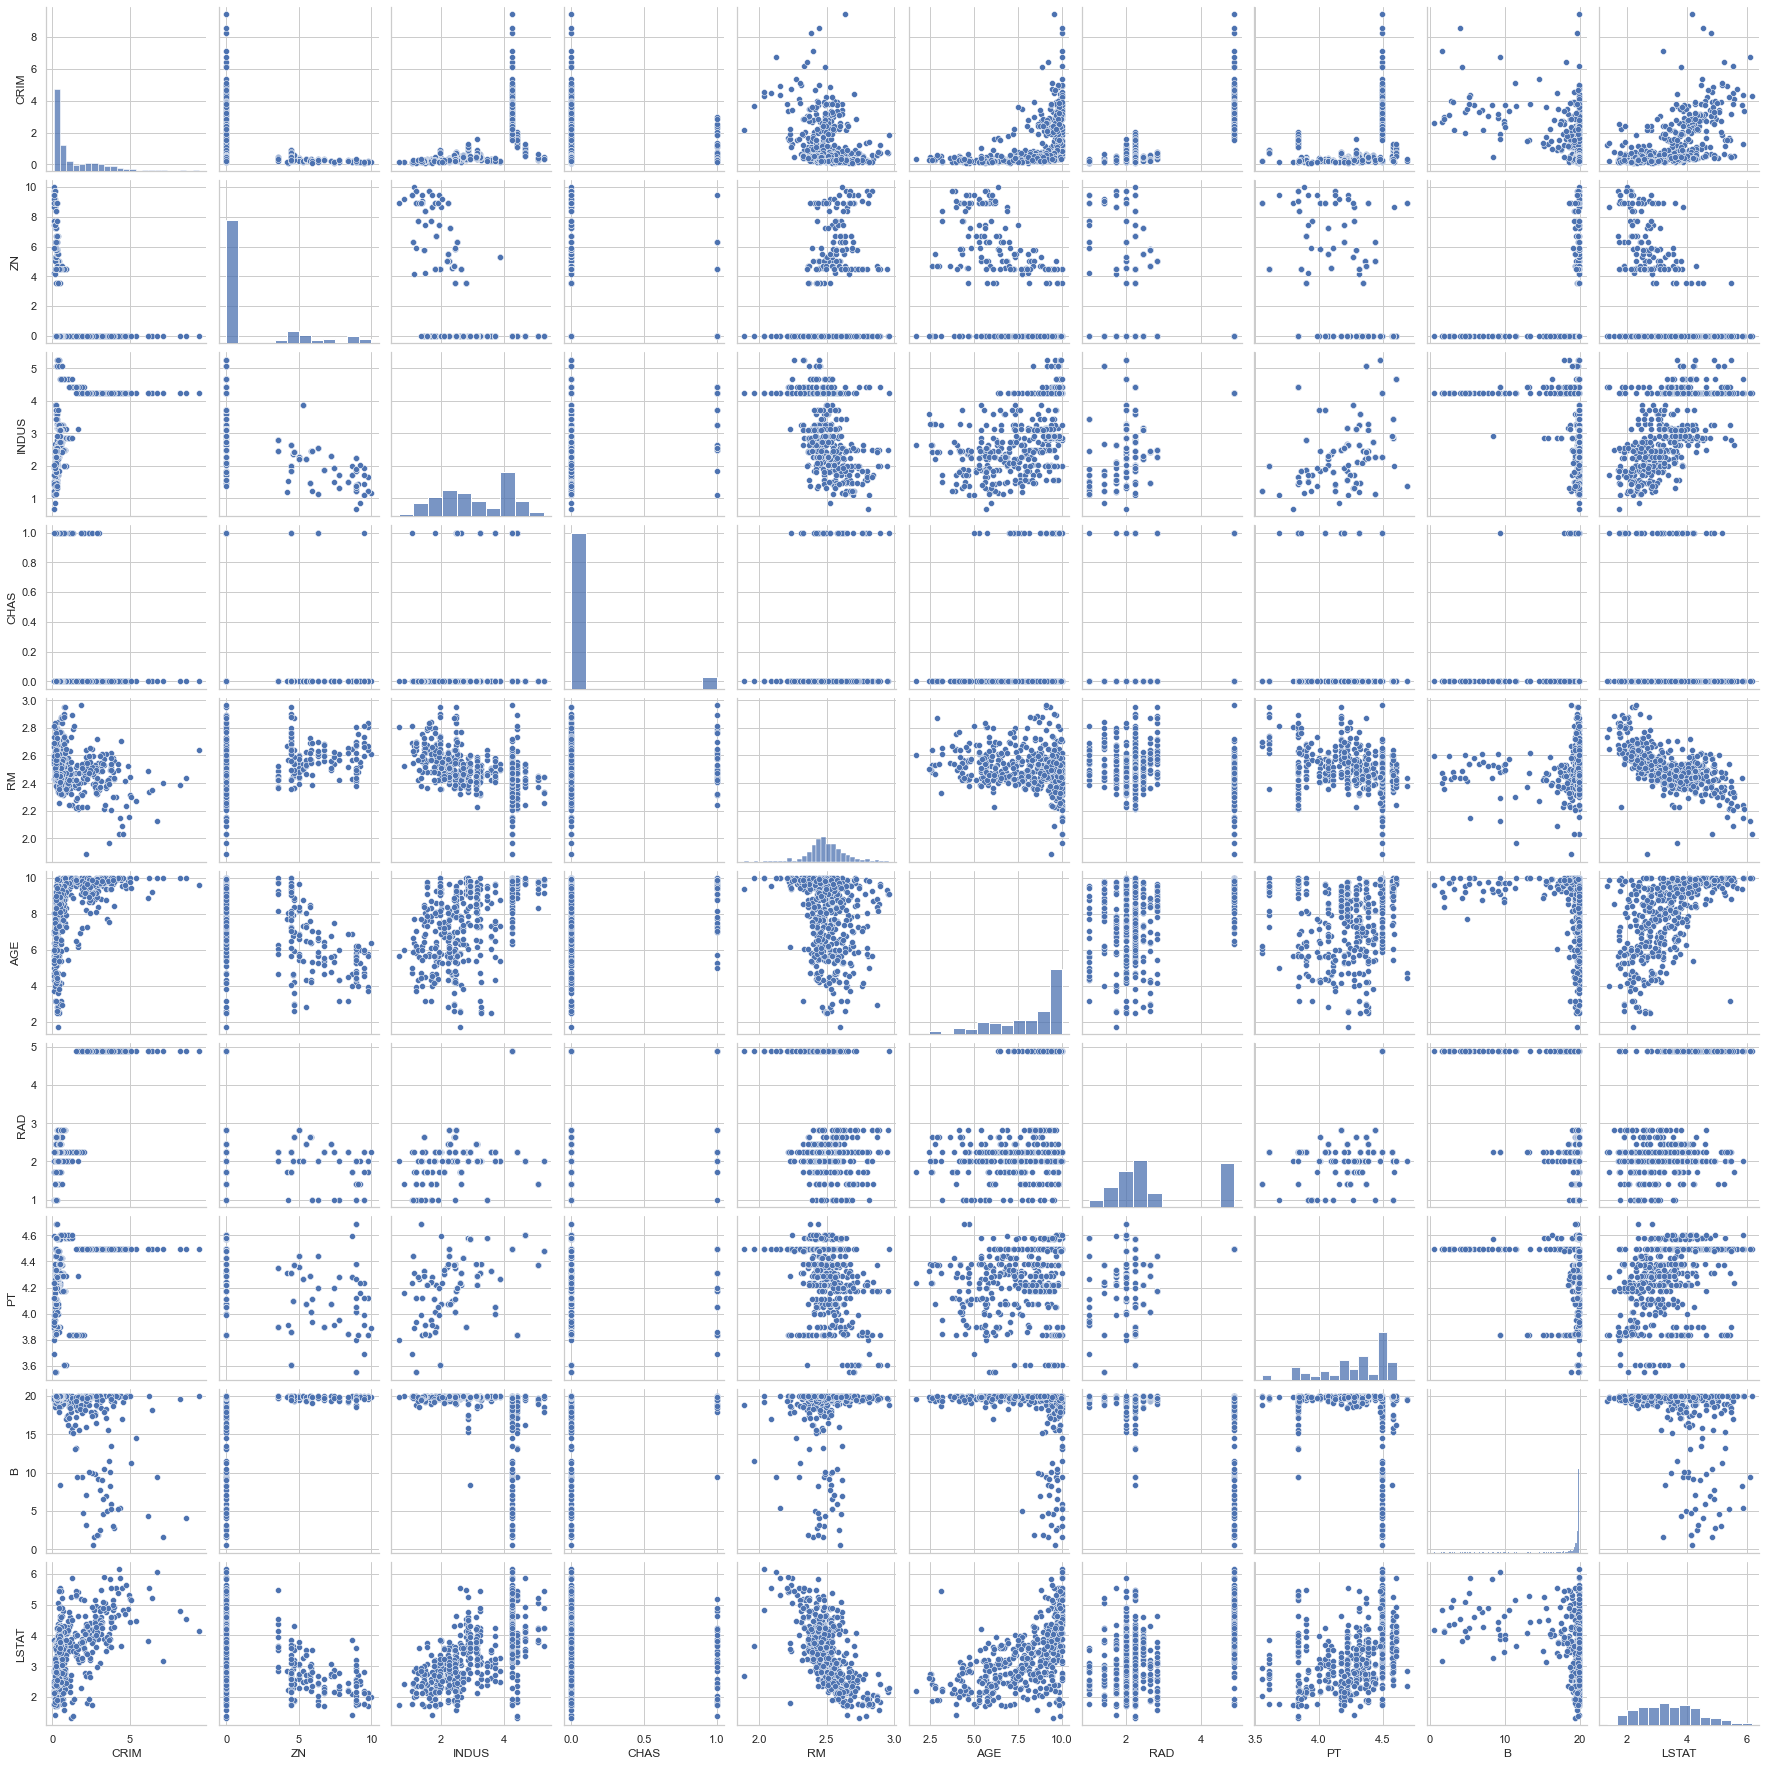

In [37]:
sns.pairplot(dataset_updated, vars = ['CRIM','ZN','INDUS','CHAS','RM','AGE','RAD','PT','B','LSTAT'])

In [38]:
X = dataset_updated[['CRIM','ZN','INDUS','CHAS','RM','AGE','RAD','PT','B','LSTAT']]
y = dataset_updated[['MV']]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150, batch_size=10)

[12:31:50] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, ...)

In [41]:
predictions = model.predict(X_test)

In [42]:
model.score(X, y)

-2.0884374808537487

In [45]:
# calculating the statistical metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 1.4871419183867984
Mean Squared Error: 2.719903881230915
Root Mean Squared Error: 1.6492131097074492


In [46]:
r2 = r2_score(y_test, predictions)
print("R squared value : ", r2)

R squared value :  -1.8693995078224823


LinregressResult(slope=0.2390453659764174, intercept=2.0440147244182088, rvalue=0.8093377568355129, pvalue=1.1329877067151387e-30, stderr=0.015516283046452474, intercept_stderr=0.07310269206335104)

In [ ]:
# thus, linear regression performs better.